<a href="https://colab.research.google.com/github/DaffaIzzalhaqqi/Trading-Simulation-Using-the-Moving-Average-Convergence-Divergence-MACD-Strategy-on-the-S-P500-/blob/main/Trading_Simulation_Using_the_Moving_Average_Convergence_Divergence_(MACD)_Strategy_on_the_S%26P500_Index_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code written by **Muhammad Yusuf Daffa Izzalhaqqi**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()
stocks = pd.read_excel('SPY_2016_2021.xlsx')

Saving SPY_2016_2021.xlsx to SPY_2016_2021.xlsx


In [3]:
stocks.head()

,Date,Close
0,2016-01-04,201.020004
1,2016-01-05,201.360001
2,2016-01-06,198.820007
3,2016-01-07,194.050003
4,2016-01-08,191.919998


In [4]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Close   1511 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.7 KB


In [5]:
#Calculate the MACD and signal lines based on the Exponential Moving Average
def calc_EMA(price, days):
  EMA = price.ewm(span = days, adjust = False).mean()
  return EMA

In [6]:
stocks['short_EMA'] = calc_EMA(stocks['Close'], 12)
stocks['long_EMA'] = calc_EMA(stocks['Close'], 26)
stocks['MACD_EMA'] = stocks['short_EMA'] - stocks['long_EMA']
stocks['signal_EMA'] = calc_EMA(stocks['MACD_EMA'], 9)
stocks['hist_EMA'] = stocks['MACD_EMA'] - stocks['signal_EMA']

In [7]:
stocks

,Date,Close,short_EMA,long_EMA,MACD_EMA,signal_EMA,hist_EMA
0,2016-01-04,201.020004,201.020004,201.020004,0.000000,0.000000,0.000000
1,2016-01-05,201.360001,201.072311,201.045189,0.027122,0.005424,0.021698
2,2016-01-06,198.820007,200.725803,200.880361,-0.154558,-0.026572,-0.127986
3,2016-01-07,194.050003,199.698757,200.374408,-0.675652,-0.156388,-0.519264
4,2016-01-08,191.919998,198.502025,199.748156,-1.246131,-0.374337,-0.871795
...,...,...,...,...,...,...,...
1506,2021-12-27,477.260010,466.795627,464.636197,2.159430,1.379720,0.779710
1507,2021-12-28,476.869995,468.345530,465.542405,2.803125,1.664401,1.138725
1508,2021-12-29,477.480011,469.750835,466.426672,3.324163,1.996353,1.327810
1509,2021-12-30,476.160004,470.736861,467.147659,3.589201,2.314923,1.274279


In [8]:
#Visualise the stocks closing price and the corresponding EMA-based MACD indicator
def visualise_EMA_chart(data):
  fig, ax = plt.subplots(2, figsize = (20,10))

  ax[0].plot(data["Date"], data["Close"], color = "skyblue", label = "Closing Price")
  ax[0].set_title("S&P500 Daily Close Price History")
  ax[0].set_ylabel("Price in USD")

  ax[1].plot(data["Date"], data["MACD_EMA"], color = "blue", label = "MACD")
  ax[1].set_title("MACD Indicator")
  ax[1].set_ylabel("Exponential Moving Average")

  ax[1].plot(data["Date"], data["signal_EMA"], color = "orange", label = "Signal")
  for i in range(len(data['Date'])):
      if data["hist_EMA"][i] < 0:
          ax[1].bar(data["Date"][i], data["hist_EMA"][i], color = 'red', label = "Histogram")
      else:
          ax[1].bar(data["Date"][i], data["hist_EMA"][i], color = 'green', label = "Histogram")

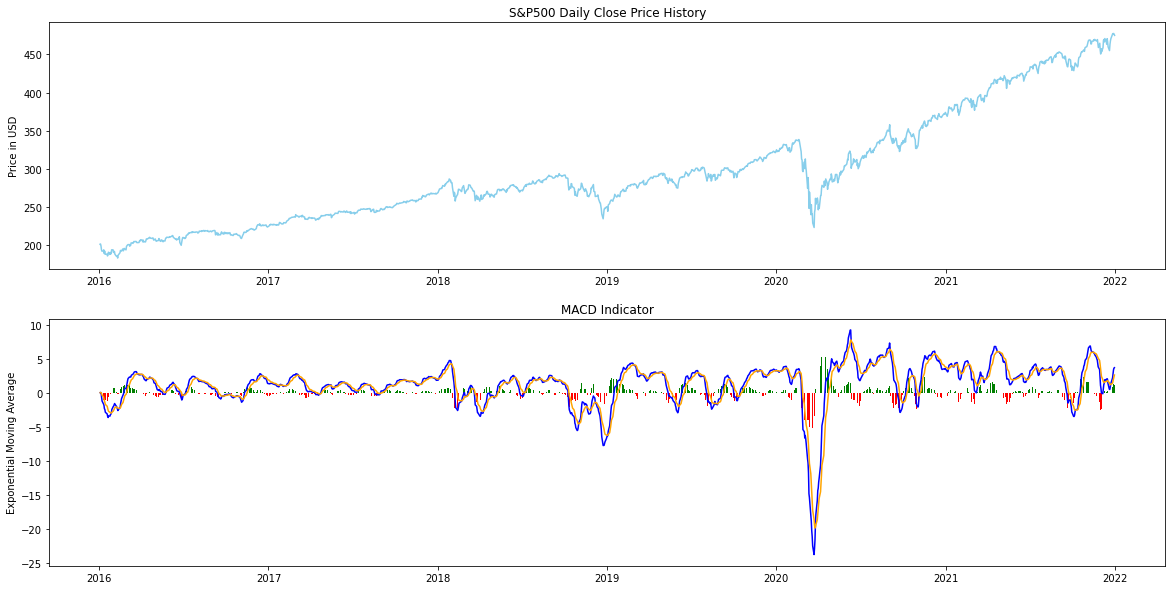

In [9]:
visualise_EMA_chart(stocks)

In [10]:
#Calculate the MACD and signal lines based on the Simple Moving Average
def calc_SMA(price, days):
  SMA = price.rolling(window = days).mean()
  return SMA

In [11]:
stocks['short_SMA'] = calc_SMA(stocks['Close'], 12)
stocks['long_SMA'] = calc_SMA(stocks['Close'], 26)
stocks['MACD_SMA'] = stocks['short_SMA'] - stocks['long_SMA']
stocks['signal_SMA'] = calc_SMA(stocks['MACD_SMA'], 9)
stocks['hist_SMA'] = stocks['MACD_SMA'] - stocks['signal_SMA']

In [12]:
stocks

,Date,Close,short_EMA,long_EMA,MACD_EMA,signal_EMA,hist_EMA,short_SMA,long_SMA,MACD_SMA,signal_SMA,hist_SMA
0,2016-01-04,201.020004,201.020004,201.020004,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,201.360001,201.072311,201.045189,0.027122,0.005424,0.021698,NaN,NaN,NaN,NaN,NaN
2,2016-01-06,198.820007,200.725803,200.880361,-0.154558,-0.026572,-0.127986,NaN,NaN,NaN,NaN,NaN
3,2016-01-07,194.050003,199.698757,200.374408,-0.675652,-0.156388,-0.519264,NaN,NaN,NaN,NaN,NaN
4,2016-01-08,191.919998,198.502025,199.748156,-1.246131,-0.374337,-0.871795,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1506,2021-12-27,477.260010,466.795627,464.636197,2.159430,1.379720,0.779710,466.460836,464.553464,1.907371,-0.116098,2.023469
1507,2021-12-28,476.869995,468.345530,465.542405,2.803125,1.664401,1.138725,467.337502,464.828079,2.509422,0.459044,2.050378
1508,2021-12-29,477.480011,469.750835,466.426672,3.324163,1.996353,1.327810,467.899170,465.158464,2.740706,1.011466,1.729240
1509,2021-12-30,476.160004,470.736861,467.147659,3.589201,2.314923,1.274279,468.698336,465.488848,3.209488,1.511167,1.698321


In [13]:
#Visualise the stocks closing price and the corresponding SMA-based MACD indicator
def visualise_SMA_chart(data):
  fig, ax = plt.subplots(2, figsize = (20,10))

  ax[0].plot(data["Date"], data["Close"], color = "skyblue", label = "Closing Price")
  ax[0].set_title("S&P500 Daily Close Price History")
  ax[0].set_ylabel("Price in USD")

  ax[1].plot(data["Date"], data["MACD_SMA"], color = "blue", label = "MACD")
  ax[1].set_title("MACD Indicator")
  ax[1].set_ylabel("Simple Moving Average")

  ax[1].plot(data["Date"], data["signal_SMA"], color = "orange", label = "Signal")
  for i in range(len(data['Date'])):
      if data["hist_SMA"][i] < 0:
          ax[1].bar(data["Date"][i], data["hist_SMA"][i], color = 'red', label = "Histogram")
      else:
          ax[1].bar(data["Date"][i], data["hist_SMA"][i], color = 'green', label = "Histogram")

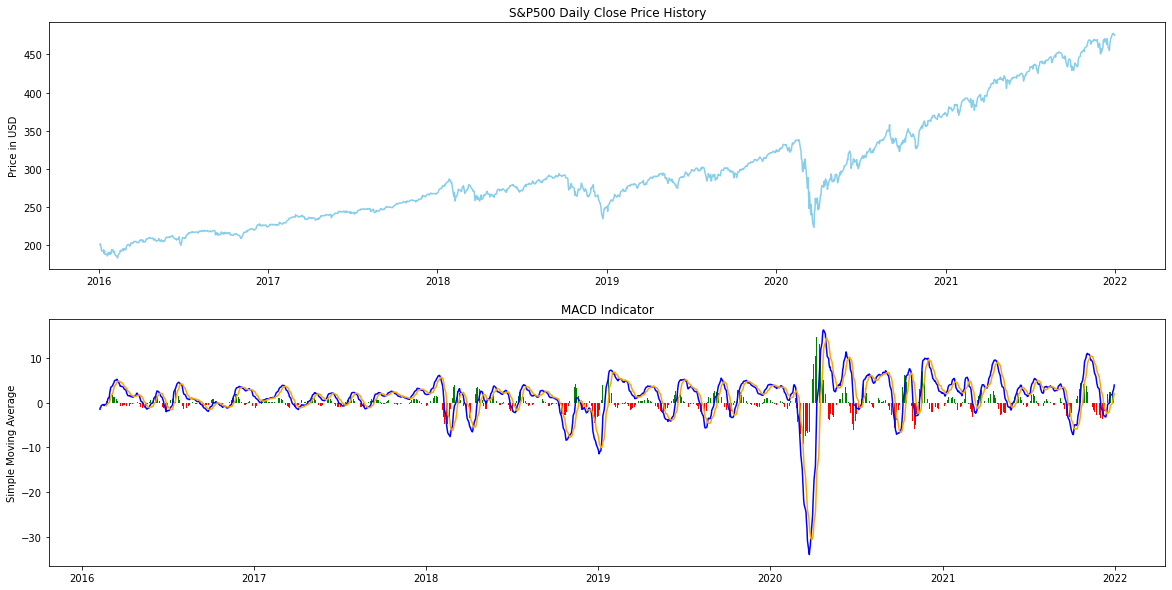

In [14]:
visualise_SMA_chart(stocks)

In [15]:
deposit = int(input("Please enter your deposit: "))

Please enter your deposit: 100000


In [16]:
#Execute trade simulation based on the rule of MACD and record the information of each trade
def trade_simulation(data, deposit, macd_type):
  trade_history = dict()
  balance = deposit
  temp_stocks_amount = 0
  index = 0

  if macd_type == "EMA":
    for i in range(len(stocks["Date"])):
      if ((stocks['MACD_EMA'][i] > stocks['signal_EMA'][i]) and temp_stocks_amount == 0):
        temp_date = stocks["Date"][i]
        temp_buying_price = stocks["Close"][i]
        temp_stocks_amount = balance/temp_buying_price
      elif ((stocks['MACD_EMA'][i] < stocks['signal_EMA'][i]) and temp_stocks_amount > 0):
        trade_history[index] = {}
        trade_history[index]['Entry Date'] = temp_date
        trade_history[index]['Exit Date'] = stocks["Date"][i]
        trade_history[index]['Buying Price'] = temp_buying_price 
        trade_history[index]['Selling Price'] = stocks["Close"][i]
        trade_history[index]['Stocks Amount'] = temp_stocks_amount
        trade_history[index]['Balance'] = trade_history[index]['Stocks Amount']*trade_history[index]['Selling Price']
        trade_history[index]['PNL'] = trade_history[index]['Balance'] - balance
        temp_stocks_amount = 0
        balance = trade_history[index]['Balance']
        index += 1
      else:
        pass
  elif macd_type == "SMA":
    for i in range(len(stocks["Date"])):
      if ((stocks['MACD_SMA'][i] > stocks['signal_SMA'][i]) and temp_stocks_amount == 0):
        temp_date = stocks["Date"][i]
        temp_buying_price = stocks["Close"][i]
        temp_stocks_amount = balance/temp_buying_price
      elif ((stocks['MACD_SMA'][i] < stocks['signal_SMA'][i]) and temp_stocks_amount > 0):
        trade_history[index] = {}
        trade_history[index]['Entry Date'] = temp_date
        trade_history[index]['Exit Date'] = stocks["Date"][i]
        trade_history[index]['Buying Price'] = temp_buying_price 
        trade_history[index]['Selling Price'] = stocks["Close"][i]
        trade_history[index]['Stocks Amount'] = temp_stocks_amount
        trade_history[index]['Balance'] = trade_history[index]['Stocks Amount']*trade_history[index]['Selling Price']
        trade_history[index]['PNL'] = trade_history[index]['Balance'] - balance
        temp_stocks_amount = 0
        balance = trade_history[index]['Balance']
        index += 1
      else:
        pass
  else:
    pass
  
  return trade_history

In [17]:
ema_macd_trade_history = trade_simulation(stocks, deposit, "EMA")
sma_macd_trade_history = trade_simulation(stocks, deposit, "SMA") 

In [18]:
df_ema_macd_trade_history = pd.DataFrame.from_dict(ema_macd_trade_history, orient='index', columns = ["Entry Date", "Exit Date", "Buying Price", "Selling Price", "Stocks Amount", "Balance", "PNL"])
df_ema_macd_trade_history

,Entry Date,Exit Date,Buying Price,Selling Price,Stocks Amount,Balance,PNL
0,2016-01-05,2016-01-06,201.360001,198.820007,496.622962,98738.581010,-1261.418990
1,2016-01-29,2016-02-09,193.720001,185.429993,509.697400,94513.185206,-4225.395804
2,2016-02-16,2016-03-24,189.779999,203.119995,498.014468,101156.696391,6643.511185
3,2016-04-18,2016-04-25,209.240005,208.610001,483.448164,100852.121687,-304.574704
4,2016-05-25,2016-06-13,209.279999,208.449997,481.900431,100452.143447,-399.978240
...,...,...,...,...,...,...,...
62,2021-08-06,2021-08-18,442.489990,439.179993,362.486512,159196.823818,-1199.829471
63,2021-08-25,2021-08-26,448.910004,446.260010,354.629709,158257.057255,-939.766563
64,2021-08-27,2021-09-08,450.250000,450.910004,351.487079,158489.040014,231.982759
65,2021-10-08,2021-11-17,437.859985,468.140015,361.962831,169449.285150,10960.245136


In [19]:
df_sma_macd_trade_history = pd.DataFrame.from_dict(sma_macd_trade_history, orient='index', columns = ["Entry Date", "Exit Date", "Buying Price", "Selling Price", "Stocks Amount", "Balance", "PNL"])
df_sma_macd_trade_history

,Entry Date,Exit Date,Buying Price,Selling Price,Stocks Amount,Balance,PNL
0,2016-02-22,2016-03-18,194.779999,204.380005,513.399736,104928.640602,4928.640602
1,2016-04-22,2016-05-02,208.970001,207.970001,502.122984,104426.517617,-502.122984
2,2016-05-24,2016-06-15,207.869995,207.750000,502.364555,104366.236324,-60.281294
3,2016-07-07,2016-07-29,209.529999,217.119995,498.096869,108146.789734,3780.553411
4,2016-08-22,2016-08-25,218.529999,217.699997,494.883038,107736.035906,-410.753828
5,2016-09-29,2016-10-17,214.679993,212.380005,501.844790,106581.799015,-1154.236892
6,2016-11-10,2016-12-06,216.919998,221.699997,491.341508,108930.410823,2348.611808
7,2016-12-20,2016-12-27,226.399994,226.270004,481.141404,108867.867433,-62.543390
8,2017-01-19,2017-03-08,225.910004,236.559998,481.908130,114000.186077,5132.318644
9,2017-04-07,2017-05-17,235.199997,235.820007,484.694675,114300.701805,300.515728


In [20]:
#Visualise the buy and sell signals corresponding to the closing price
def visualise_trade_signal(stocks_data, trade_data, code):
  fig, ax = plt.subplots(2, figsize = (20,10))

  ax[0].plot(stocks_data["Date"], stocks_data["Close"], color = "skyblue", label = "Closing Price")
  ax[0].plot(trade_data["Entry Date"], trade_data["Buying Price"], marker = '^', color = "green", label = "Buy Signal", linewidth = 0)
  ax[0].plot(trade_data["Exit Date"], trade_data["Selling Price"], marker = 'v', color = "red", label = "Sell Signal", linewidth = 0)
  ax[0].legend()
  if code == "EMA":
    ax[0].set_title("Trade Signal Based on Daily Closing Price of S&P500 Using EMA-based MACD")
  elif code == "SMA":
    ax[0].set_title("Trade Signal Based on Daily Closing Price of S&P500 Using SMA-based MACD")
  else:
    pass
  ax[0].set_ylabel("Price in USD")

  if code == "EMA":
    ax[1].plot(stocks_data["Date"], stocks_data["MACD_EMA"], color = "blue", label = "MACD")
    ax[1].set_title("MACD Indicator")
    ax[1].set_ylabel("Exponential Moving Average")

    ax[1].plot(stocks_data["Date"], stocks_data["signal_EMA"], color = "orange", label = "Signal")
    for i in range(len(stocks_data['Date'])):
        if stocks_data["hist_EMA"][i] < 0:
            ax[1].bar(stocks_data["Date"][i], stocks_data["hist_EMA"][i], color = 'red', label = "Histogram")
        else:
            ax[1].bar(stocks_data["Date"][i], stocks_data["hist_EMA"][i], color = 'green', label = "Histogram")
  elif code == "SMA":
    ax[1].plot(stocks_data["Date"], stocks_data["MACD_SMA"], color = "blue", label = "MACD")
    ax[1].set_title("MACD Indicator")
    ax[1].set_ylabel("Simple Moving Average")

    ax[1].plot(stocks_data["Date"], stocks_data["signal_SMA"], color = "orange", label = "Signal")
    for i in range(len(stocks_data['Date'])):
        if stocks_data["hist_EMA"][i] < 0:
            ax[1].bar(stocks_data["Date"][i], stocks_data["hist_SMA"][i], color = 'red', label = "Histogram")
        else:
            ax[1].bar(stocks_data["Date"][i], stocks_data["hist_SMA"][i], color = 'green', label = "Histogram")
  else:
    pass

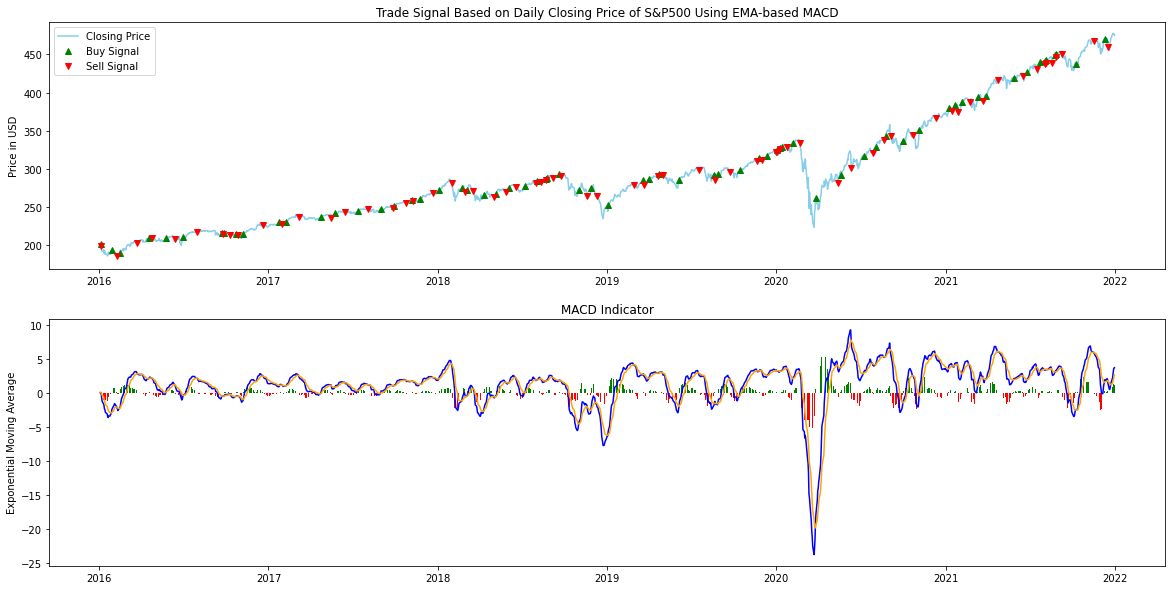

In [21]:
visualise_trade_signal(stocks, df_ema_macd_trade_history, "EMA")

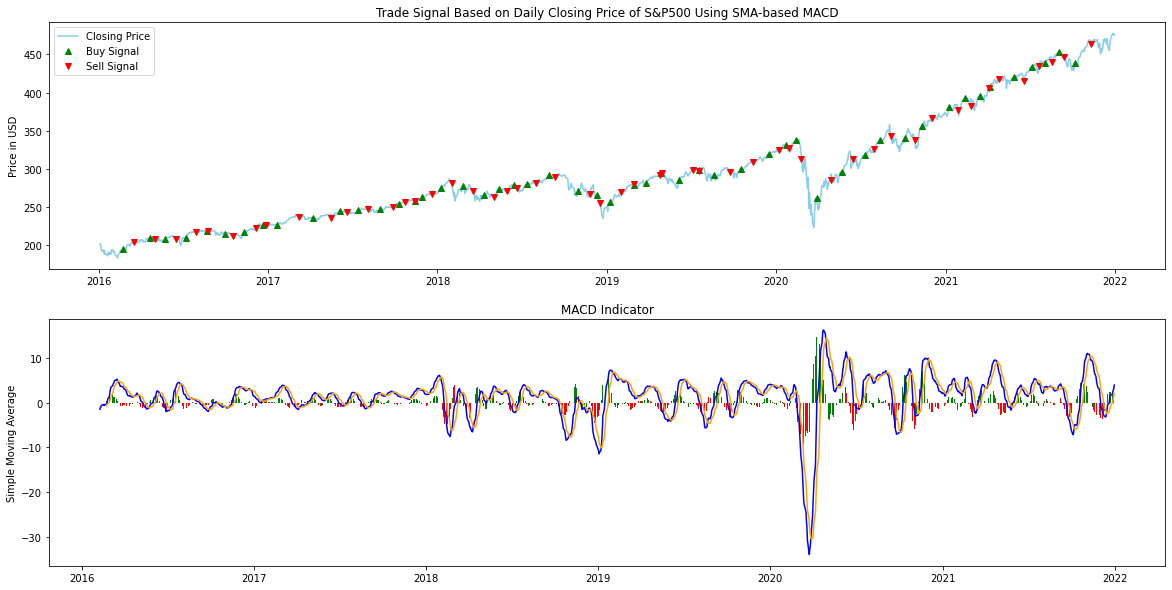

In [22]:
visualise_trade_signal(stocks, df_sma_macd_trade_history, "SMA")

In [23]:
#Calculate the resulting balance and PnL should an alternative long-term buy-hold-sell scenario was implemented
def buy_hold_sell(data, deposit):
  buying_price = list(data["Close"])[0]
  selling_price = list(data["Close"])[-1]
  stocks_amount = deposit/buying_price
  return (selling_price - buying_price)* stocks_amount

In [24]:
long_term_hold = buy_hold_sell(stocks, deposit)
long_term_hold

136274.9882401361

In [25]:
pnl_long_term_hold = long_term_hold - deposit
pnl_long_term_hold

36274.988240136096

In [26]:
#Display the summary information about the trades based on each method
def summary_table(data, code, comparison):
  summary = dict()
  no_trade = 0
  win = 0
  loss = 0
  PNL = 0
  for i in range(len(data["PNL"])):
    if list(data["PNL"])[i] > 0:
      win += 1
    elif list(data["PNL"])[i] < 0:
      loss += 1
    else:
      pass
    PNL += data["PNL"][i]
    no_trade += 1
  summary = {"Total Trade" : no_trade,
             "Win" : win,
             "Loss" : loss,
             "Win Rate (%)" : (win/no_trade)*100,
             "Cumulative PNL ($USD)" : PNL,
             "Average PNL per trade ($USD)" : PNL/no_trade,
             "Relative PNL to Buy-Hold-Sell" : (PNL-comparison)/PNL}
  if code == "EMA":
    print("The following is a summary of the trade simulation using EMA-based MACD with an initial deposit of {}\n".format(deposit), summary)
  elif code == "SMA":
    print("The following is a summary of the trade simulation using SMA-based MACD with an initial deposit of {}\n".format(deposit), summary)
  else:
    pass

In [27]:
summary_table(df_ema_macd_trade_history, "EMA", pnl_long_term_hold)

The following is a summary of the trade simulation using EMA-based MACD with an initial deposit of 100000
 {'Total Trade': 67, 'Win': 32, 'Loss': 35, 'Win Rate (%)': 47.76119402985074, 'Cumulative PNL ($USD)': 65536.48203078166, 'Average PNL per trade ($USD)': 978.1564482206218, 'Relative PNL to Buy-Hold-Sell': 0.44649167736684137}


In [28]:
summary_table(df_sma_macd_trade_history, "SMA", pnl_long_term_hold)

The following is a summary of the trade simulation using SMA-based MACD with an initial deposit of 100000
 {'Total Trade': 51, 'Win': 29, 'Loss': 22, 'Win Rate (%)': 56.86274509803921, 'Cumulative PNL ($USD)': 57084.527094042365, 'Average PNL per trade ($USD)': 1119.3044528243602, 'Relative PNL to Buy-Hold-Sell': 0.36453904259597625}
